In [64]:
from ultralytics import RTDETR
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [65]:
# If first time run: model = RTDETR('pretrained/rtdetr-l.pt').to(device)
model = RTDETR("pretrained/rtdetr-l.pt").to(device)
# model = RTDETR('rtdetr-x.pt').to(device) # Extra Large

# Display model information (optional)
model.info()

# # Train the model on the COCO8 example dataset for 100 epochs
# results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

rt-detr-l summary: 673 layers, 32970476 parameters, 0 gradients


(673, 32970476, 0, 0)

- `rtdetr-x.pt`: 55ms per frame with (1200 * 2000) (18 fps) | 34 ms per frame (384 * 384) (30 fps)
- `rtdetr-l.pt`: 49ms per frame with (1200 * 2000) (20 fps) | 25 ms per frame (384 * 384) (40 fps)

In [66]:
%%time
results = model("assets/demo1_384.jpg")


image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 17.3ms
Speed: 33.0ms preprocess, 17.3ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)


CPU times: user 527 ms, sys: 0 ns, total: 527 ms
Wall time: 701 ms


In [67]:
import matplotlib.pyplot as plt

results = model("assets/demo1_384.jpg")

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Check and convert to RGB if necessary
if annotated_frame.shape[-1] == 3:  # Ensure it's a color image
    annotated_frame = annotated_frame[..., ::-1]  # Convert BGR to RGB


image 1/1 /mnt/c/Users/Sergiu/Desktop/AnomalyDetection/assets/demo1_384.jpg: 640x640 4 21s, 178.3ms
Speed: 2.8ms preprocess, 178.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


In [68]:
annotated_frame.shape

(384, 384, 3)

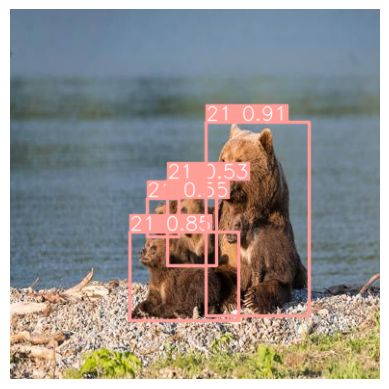

In [69]:
%matplotlib inline
# Display the annotated frame
plt.imshow(annotated_frame)
plt.axis("off")
plt.show()